
#### **Speech Emotion Recognition**

*   Neil Patel



### **Importing the Libraries**

In [2]:
#Graphs plotting packages
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython #To play the music on the notebook
import numpy as np
import pandas as pd
import librosa #Python packagae for audio and music analysis
import librosa.display #to visualize audio signals
#Deep learning packags import
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
#libraries for importing the files from drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pickle

### **Mounting the Drive with google colab**

In [5]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [6]:
%pwd


'/content'

In [7]:
%cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [8]:
%cd MLDL_AUDIO/

[Errno 2] No such file or directory: 'MLDL_AUDIO/'
/content/gdrive/MyDrive


In [9]:
%ls

'ACN T1.gdoc'
 ADBMS_1
 ADBMS_HW1.gdoc
 ADBMS_HW2.gdoc
'ADBMS HW3.gdoc'
 ADBMS_HW4.gdoc
 ADBMS_HW5.gdoc
 ADBMS_HW6.gdoc
 ADBMS_HW7.gdoc
 archive.zip
 Bios.docx
'Capstone Project (1).gdoc'
'Capstone Project.gdoc'
'Chapter 1.gslides'
'Chapter 2.gslides'
'Chapter 3.pptx'
'Chapter 4.gslides'
'Chapter 5.pptx'
'Chapter 6.pptx'
'Chapter 7.gslides'
'Chapter 8.gslides'
'CN HW1.gdoc'
'CN HW2.gdoc'
'CN HW3.gdoc'
 CNHW4.gdoc
'CN Notes.gdoc'
'CN Project Concepts.gdoc'
'CN Project.gdoc'
'CN Project.gslides'
'CNS Progress 1.gdoc'
'Colab Notebooks'/
'Cover Letter (1).gdoc'
'Cover Letter.gdoc'
 Crema/
'Data S&P Project.gdoc'
 DheerajKumarSundar_ApplicationSecurity.gdoc
 DheerajKumarSundar-Module1-Lab.gdoc
'DheerajkumarSundar-Module2-Cryptographic Data Integrity Algorithms.gdoc'
'DheerajKumarSundar-Module2-Lab-Network Traffic and Denial of Service.gdoc'
'DheerajKumarSundar-Module2-Scanning and Reconnaissance.gdoc'
 DheerajKumarSundar-Module3-Lab-TCPAttacks.gdoc
 DheerajKumarSundar-Module3-NetworkSecurit

In [ ]:
#Unzipping the file 
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [10]:
%ls

'ACN T1.gdoc'
 ADBMS_1
 ADBMS_HW1.gdoc
 ADBMS_HW2.gdoc
'ADBMS HW3.gdoc'
 ADBMS_HW4.gdoc
 ADBMS_HW5.gdoc
 ADBMS_HW6.gdoc
 ADBMS_HW7.gdoc
 archive.zip
 Bios.docx
'Capstone Project (1).gdoc'
'Capstone Project.gdoc'
'Chapter 1.gslides'
'Chapter 2.gslides'
'Chapter 3.pptx'
'Chapter 4.gslides'
'Chapter 5.pptx'
'Chapter 6.pptx'
'Chapter 7.gslides'
'Chapter 8.gslides'
'CN HW1.gdoc'
'CN HW2.gdoc'
'CN HW3.gdoc'
 CNHW4.gdoc
'CN Notes.gdoc'
'CN Project Concepts.gdoc'
'CN Project.gdoc'
'CN Project.gslides'
'CNS Progress 1.gdoc'
'Colab Notebooks'/
'Cover Letter (1).gdoc'
'Cover Letter.gdoc'
 Crema/
'Data S&P Project.gdoc'
 DheerajKumarSundar_ApplicationSecurity.gdoc
 DheerajKumarSundar-Module1-Lab.gdoc
'DheerajkumarSundar-Module2-Cryptographic Data Integrity Algorithms.gdoc'
'DheerajKumarSundar-Module2-Lab-Network Traffic and Denial of Service.gdoc'
'DheerajKumarSundar-Module2-Scanning and Reconnaissance.gdoc'
 DheerajKumarSundar-Module3-Lab-TCPAttacks.gdoc
 DheerajKumarSundar-Module3-NetworkSecurit

In [ ]:
#There are 3 dataset in each 
crema_filepath='./Crema/' # CREMA-D is an audio-visual data set for emotion recognition.
ravdess_filepath='./Ravdess/audio_speech_actors_01-24' #RAVDESS Emotional speech audio
savee_filepath='./Savee/' #Surrey Audio-Visual Expressed Emotion
tess_filepath='./Tess/' # Toronto emotional speech set (TESS)

### **Traversing the each folder**

In [ ]:
#making a list of each emotion labelled for Crema by reading the file name and extarcting the label from it   
#Example of file name 1001_DFA_ANG_XX.wav
emotions_crema=[]
for wav in os.listdir(crema_filepath):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        emotions_crema.append(('sad',crema_filepath+'/'+wav))
    elif emotion[2]=='HAP':
        emotions_crema.append(('happy',crema_filepath+'/'+wav))
    elif emotion[2]=='NEU':
        emotions_crema.append(('neutral',crema_filepath+'/'+wav))
    elif emotion[2]=='ANG':
        emotions_crema.append(('angry',crema_filepath+'/'+wav))
    elif emotion[2]=='DIS':
        emotions_crema.append(('disgust',crema_filepath+'/'+wav))
    elif emotion[2]=='FEA':
        emotions_crema.append(('fear',crema_filepath+'/'+wav))
    else:
        emotions_crema.append(('unknown',crema_filepath+'/'+wav))
crema_df=pd.DataFrame.from_dict(emotions_crema)
crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
crema_df.head()


,Emotion,File_Path
0,angry,./Crema//1001_DFA_ANG_XX.wav
1,disgust,./Crema//1001_DFA_DIS_XX.wav
2,fear,./Crema//1001_DFA_FEA_XX.wav
3,happy,./Crema//1001_DFA_HAP_XX.wav
4,neutral,./Crema//1001_DFA_NEU_XX.wav


In [ ]:
crema_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [ ]:
#Labelling the Ravdess dataset with the emotions by reading the file name and extarcting the label from it
#Example of file format 03-01-01-01-01-01-02.wav 
emotions_ravdess=[]
for directory in os.listdir(ravdess_filepath):
    for wav in os.listdir(os.path.join(ravdess_filepath,directory)):
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        emotions_ravdess.append((emotion_number,os.path.join(ravdess_filepath,directory,wav)))
ravdess_df=pd.DataFrame.from_dict(emotions_ravdess)
ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
ravdess_df.head()

,Emotion,File_Path
0,neutral,./Ravdess/audio_speech_actors_01-24/Actor_01/0...
1,neutral,./Ravdess/audio_speech_actors_01-24/Actor_01/0...
2,neutral,./Ravdess/audio_speech_actors_01-24/Actor_01/0...
3,neutral,./Ravdess/audio_speech_actors_01-24/Actor_01/0...
4,neutral,./Ravdess/audio_speech_actors_01-24/Actor_01/0...


In [ ]:
ravdess_df['Emotion'].unique()

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [ ]:
#making a list of labels of emotion from the Savee dataset by reading the file name and extarcting the label from it  
# Example of file DC_a01.wav
emotions_savee=[]
for wav in os.listdir(savee_filepath):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        emotions_savee.append(('angry',savee_filepath+'/'+wav))
    elif emotion=='n':
        emotions_savee.append(('neutral',savee_filepath+'/'+wav))
    elif emotion=='sa':
        emotions_savee.append(('sad',savee_filepath+'/'+wav))
    elif emotion=='su':
        emotions_savee.append(('surprise',savee_filepath+'/'+wav))
    elif emotion=='d':
        emotions_savee.append(('disgust',savee_filepath+'/'+wav))
    elif emotion=='f':
        emotions_savee.append(('fear',savee_filepath+'/'+wav))
    elif emotion=='h':
        emotions_savee.append(('happy',savee_filepath+'/'+wav))
savee_df=pd.DataFrame.from_dict(emotions_savee)
savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
savee_df.head()


,Emotion,File_Path
0,angry,./Savee//DC_a01.wav
1,angry,./Savee//DC_a02.wav
2,angry,./Savee//DC_a03.wav
3,angry,./Savee//DC_a04.wav
4,angry,./Savee//DC_a05.wav


In [ ]:
savee_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
#making a list of labels of emotion from the Tess dataset by reading the file name and extarcting the label from it  
# Example of file OAF_back_angry.wav

emotions_tess=[]
for directory in os.listdir(tess_filepath):
    for wav in os.listdir(os.path.join(tess_filepath,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            emotions_tess.append(('surprise',os.path.join(tess_filepath,directory,wav)))
        else:
            emotions_tess.append((emotion[2],os.path.join(tess_filepath,directory,wav)))
tess_df=pd.DataFrame.from_dict(emotions_tess)
tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
tess_df.head()

,Emotion,File_Path
0,fear,./Tess/OAF_Fear/OAF_back_fear.wav
1,fear,./Tess/OAF_Fear/OAF_bar_fear.wav
2,fear,./Tess/OAF_Fear/OAF_base_fear.wav
3,fear,./Tess/OAF_Fear/OAF_bath_fear.wav
4,fear,./Tess/OAF_Fear/OAF_bean_fear.wav


In [ ]:
tess_df["Emotion"].unique()

array(['fear', 'surprise', 'sad', 'angry', 'disgust', 'happy', 'neutral'],
      dtype=object)

In [ ]:
##Concatenating the all the dataset into one 
main_df=pd.concat([crema_df,ravdess_df,savee_df,tess_df],axis=0)
main_df.shape

(12162, 2)

### **Visulaization of graphs**

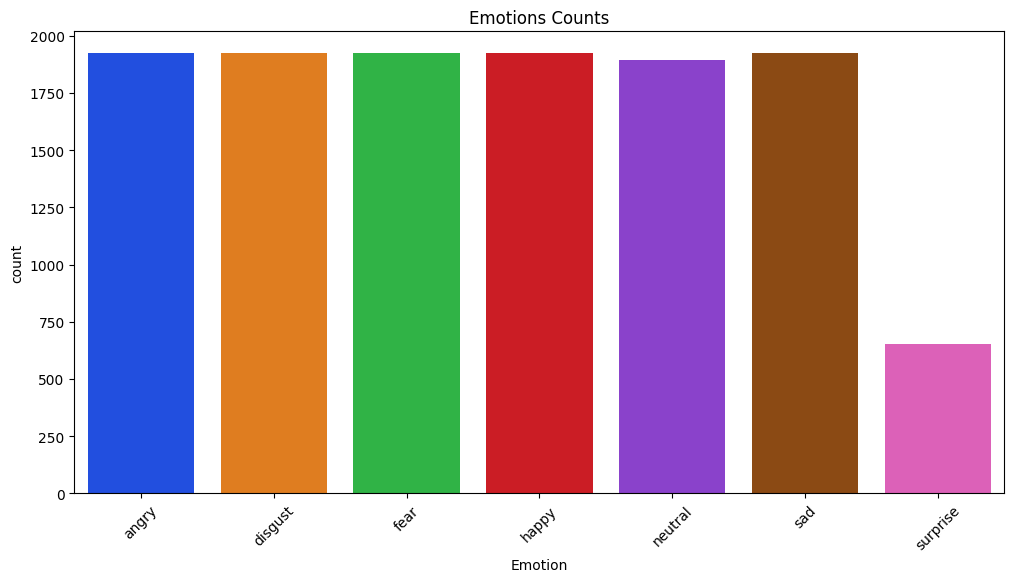

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='bright')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
emotion_names=main_df['Emotion'].unique()


In [ ]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [ ]:
def plot_wave(data,sr,emotion,color):
    """Plots the waveform of the input audio data.

    Args:
        data: Input audio data.
        sr: Sampling rate of the audio data.
        emotion: Emotion label associated with the audio data.
        color: Color of the waveform plot.

    Returns:
        None.
    """
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

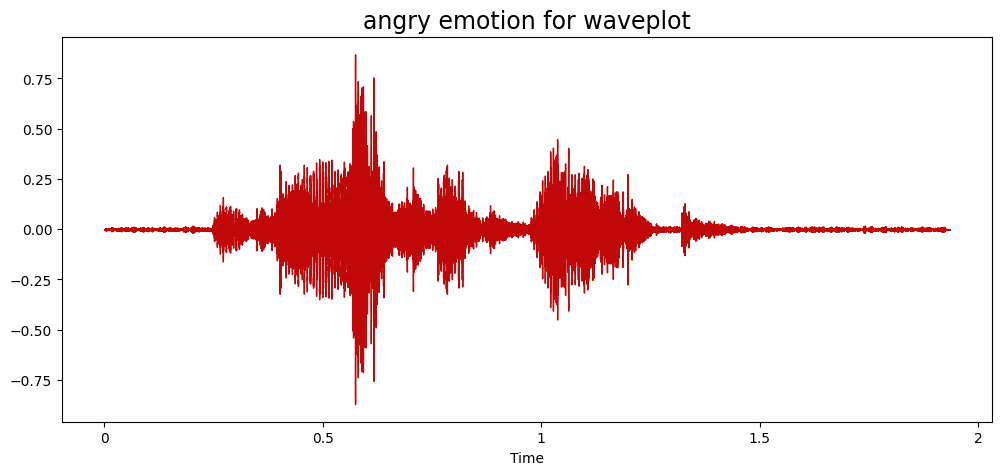

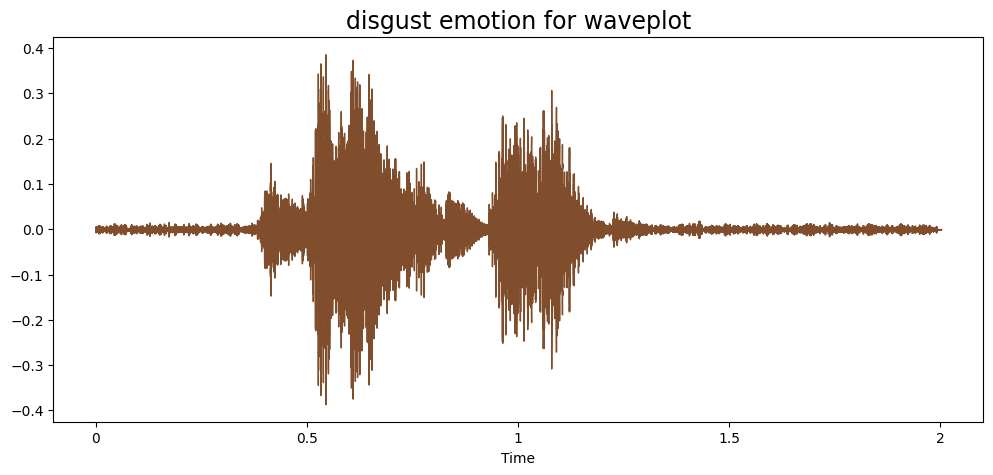

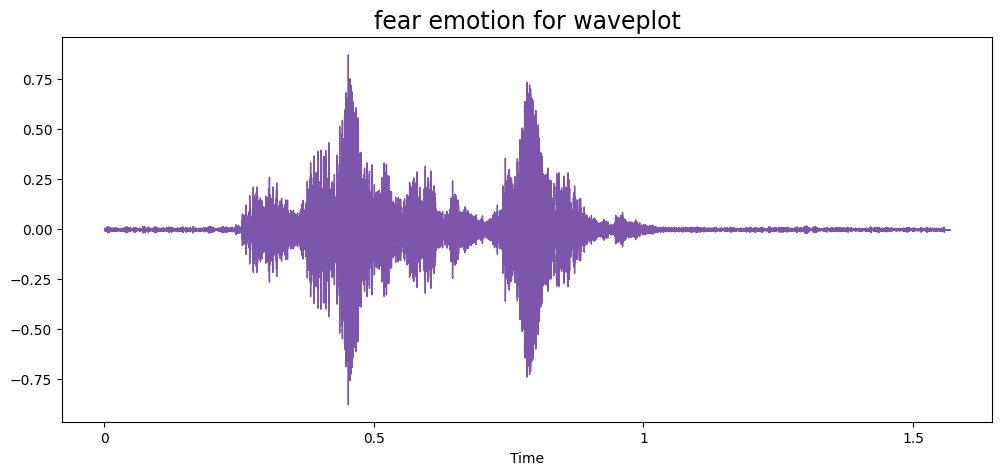

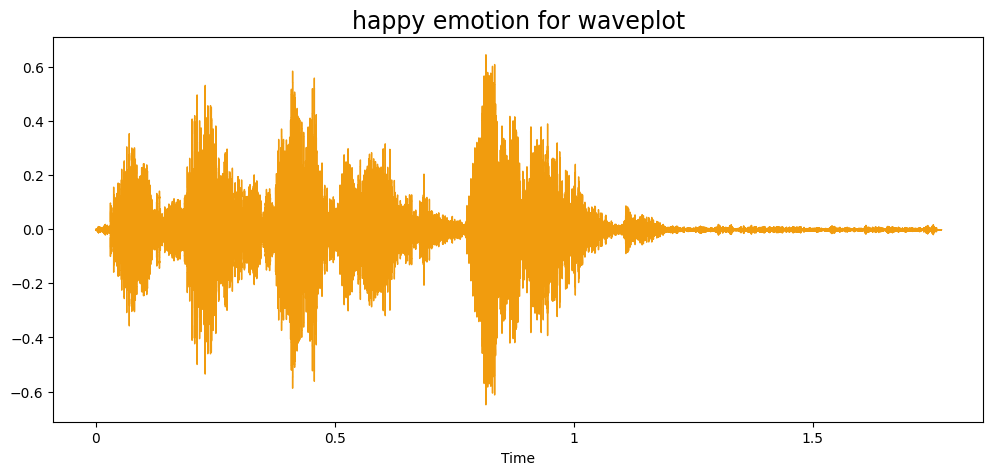

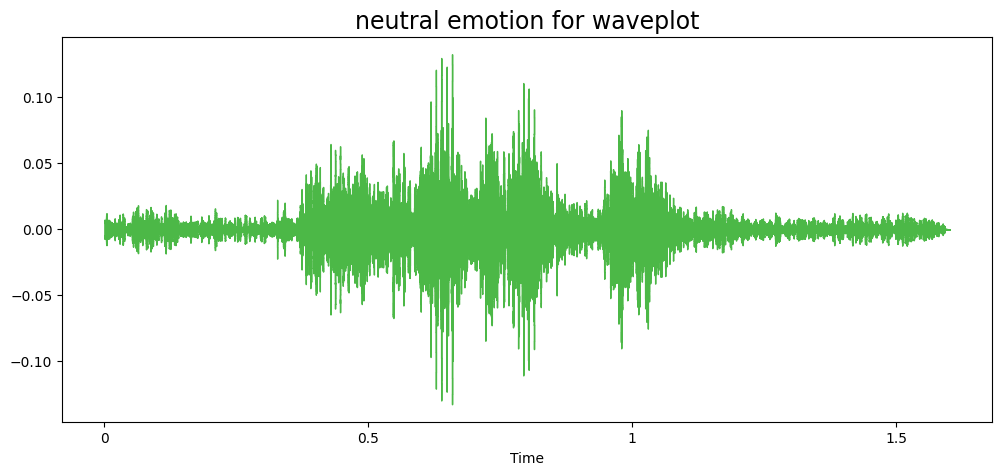

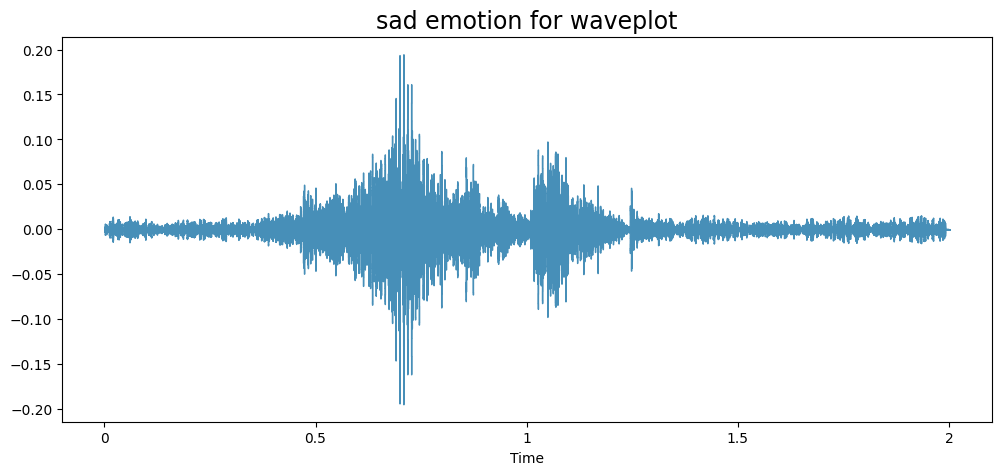

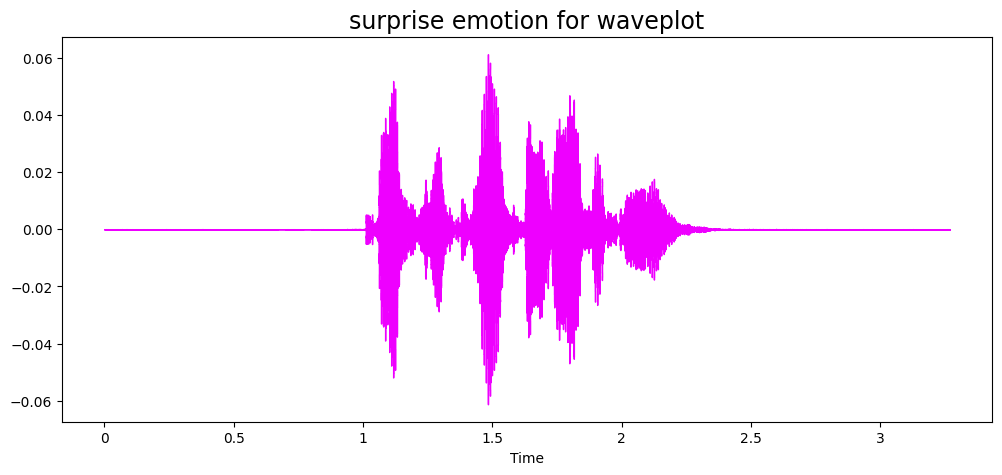

In [ ]:
#taking a sample of each emotion in audio file and plotting the waveform graph of it
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    plot_wave(data,sr,emotion,colors[emotion])
    audio_path.append(path)

### **Sample of each emotion**

In [ ]:
print('SAD Audio Sample\n')
IPython.display.Audio(audio_path[0])



SAD Audio Sample



In [ ]:
print('Anger Audio Sample\n')
IPython.display.Audio(audio_path[1])

Anger Audio Sample



In [ ]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[2])


Disgust Audio Sample



In [ ]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[3])


Fear Audio Sample



In [ ]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[4])


Happy Audio Sample



In [ ]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[5])


Neutral Audio Sample



In [ ]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])


Surprise Audio Sample



In [ ]:
def make_data_noisy(data,random=False,rate=0.050,threshold=0.01):
    """Adds random noise to the input data.

    Args:
        data: Input data.
        random: Whether to apply random noise. If True, rate is calculated randomly using a threshold.
        rate: Magnitude of the noise to be applied.
        threshold: Maximum value of the random rate.

    Returns:
        Augmented data with added noise.

    """
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def random_shifting(data,rate=1000):
    """Shifts the input data randomly by a number of samples.

    Args:
        data: Input data.
        rate: Magnitude of the shift.

    Returns:
        Augmented data with shifted samples.
    """
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def change_pitch(data,sr,pitch_factor=0.6,random=False):
    """Changes the pitch of the input data.

    Args:
        data: Input data.
        sr: Sampling rate of the input data.
        pitch_factor: Factor to change the pitch by.
        random: Whether to apply random pitch factor. If True, pitch_factor is calculated randomly.

    Returns:
        Augmented data with changed pitch.
    """
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data,sr=sr,n_steps=pitch_factor)

def add_stretch(data,rate=0.7):
    """Stretches the input data by a certain factor.

    Args:
        data: Input data.
        rate: Factor to stretch the data by.

    Returns:
        Augmented data with stretched samples.
    """
    return librosa.effects.time_stretch(data,rate=rate)
    

In [ ]:
data,sr=librosa.load(audio_path[6])
#The function loads the audio data and returns a tuple containing two values:
#data:The audio signal as a one-dimensional numpy array of samples.
#sr:The sampling rate of the audio signal (in Hz), which is the number of samples per second.

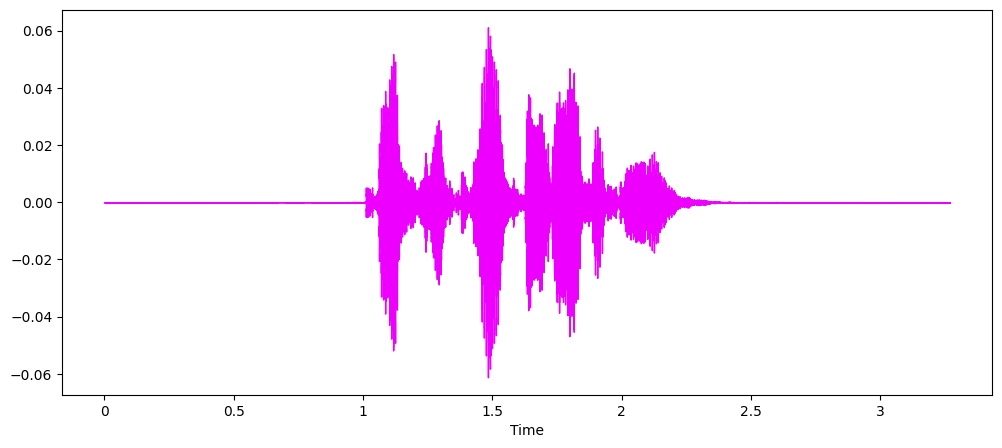

In [ ]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,sr=sr,color='#EE00FF')
IPython.display.Audio(audio_path[6])

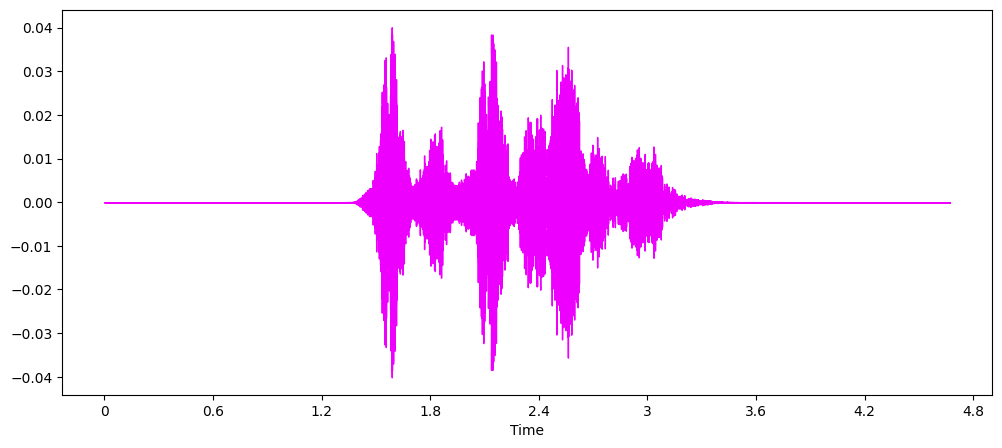

In [ ]:
stretched_audio=add_stretch(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(stretched_audio,rate=sr)


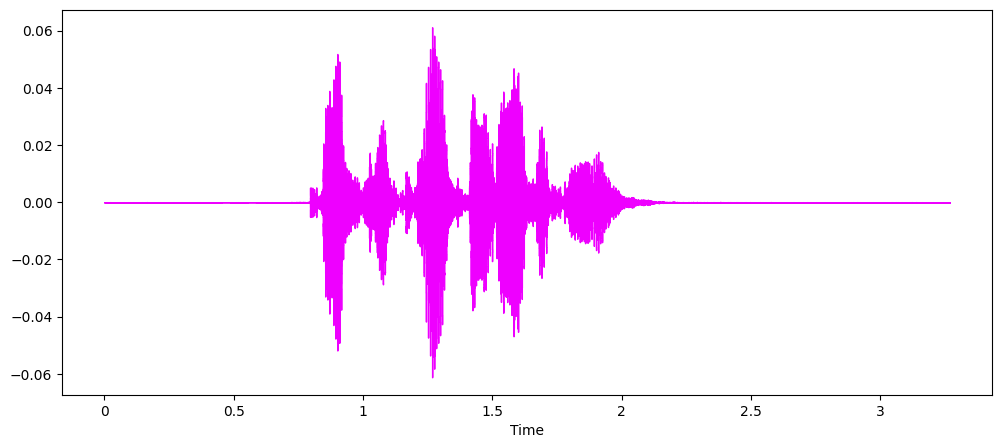

In [ ]:
shifted_audio=random_shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(shifted_audio,rate=sr)

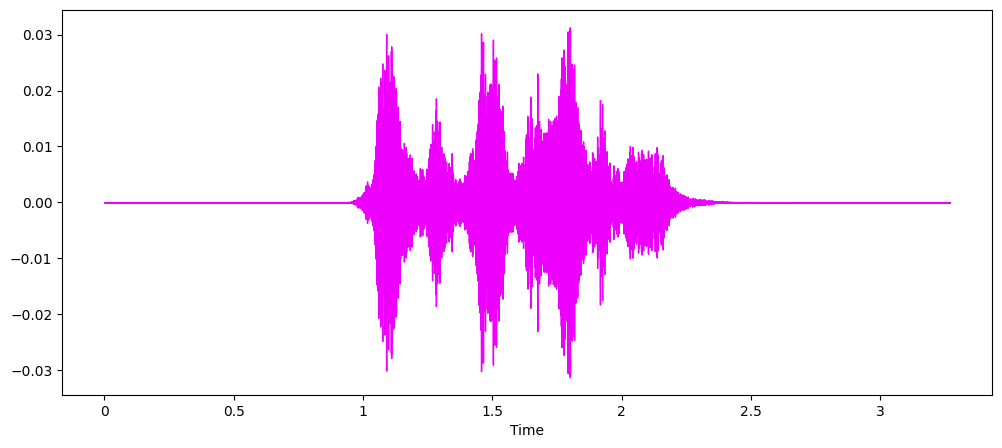

In [ ]:
pitched_audio=change_pitch(data,sr)
plt.figure(figsize=(12,5))
librosa.display.waveshow(pitched_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(pitched_audio,rate=sr)


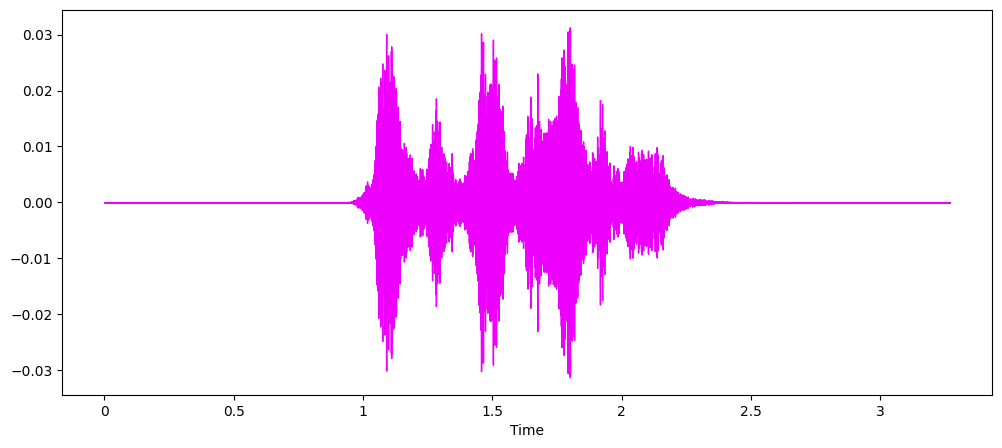

In [ ]:
pitched_audio=change_pitch(data,sr)
plt.figure(figsize=(12,5))
librosa.display.waveshow(pitched_audio,sr=sr,color='#EE00FF')
IPython.display.Audio(pitched_audio,rate=sr)


In [ ]:
def compute_zcr(data,frame_length,hop_length):
    """Computes the zero-crossing rate (ZCR) of the audio signal.

    Args:
        data: Input audio data.
        frame_length: Length of each analysis frame (in samples).
        hop_length: Hop length between consecutive frames (in samples).

    Returns:
        The computed ZCR values as a numpy array.
    """
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def compute_rmse(data,frame_length=2048,hop_length=512):
    """Computes the zero-crossing rate (ZCR) of the audio signal.

    Args:
        data: Input audio data.
        frame_length: Length of each analysis frame (in samples).
        hop_length: Hop length between consecutive frames (in samples).

    Returns:
        The computed ZCR values as a numpy array.
    """
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def compute_mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    """Computes the Mel-frequency cepstral coefficients (MFCC) of the audio signal.

    Args:
        data: Input audio data.
        sr: Sampling rate of the audio data (in Hz).
        frame_length: Length of each analysis frame (in samples).
        hop_length: Hop length between consecutive frames (in samples).
        flatten: Whether to flatten the resulting MFCC matrix to a one-dimensional array.

    Returns:
        The computed MFCC values as a numpy array.
    """
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def identify_features(data,sr,frame_length=2048,hop_length=512):
    """Extracts various audio features from the input audio data.

    Args:
        data: Input audio data.
        sr: Sampling rate of the audio data (in Hz).
        frame_length: Length of each analysis frame (in samples).
        hop_length: Hop length between consecutive frames (in samples).

    Returns:
        A numpy array containing the extracted features.
    """
    result=np.array([])
    
    result=np.hstack((result,
                      compute_zcr(data,frame_length,hop_length),
                      compute_rmse(data,frame_length,hop_length),
                      compute_mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_all_features(path,duration=2.5, offset=0.6):
    """
    Extracts audio features from a given audio file path.

    Args:
    path (str): path to audio file
    duration (float): duration of audio to be loaded in seconds (default=2.5)
    offset (float): offset to start reading audio in seconds (default=0.6)

    Returns:
    np.ndarray: audio features extracted from the audio file
    """
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=identify_features(data,sr)
    audio=np.array(aud)
    
    audio_with_noise=make_data_noisy(data,random=True)
    aud2=identify_features(audio_with_noise,sr)
    audio=np.vstack((audio,aud2))
    
    audio_with_pitch=change_pitch(data,sr,random=True)
    aud3=identify_features(audio_with_pitch,sr)
    audio=np.vstack((audio,aud3))
    
    audio_with_pitch1=change_pitch(data,sr,random=True)
    audio_with_pitch_with_noise=make_data_noisy(audio_with_pitch1,random=True)
    aud4=identify_features(audio_with_pitch_with_noise,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

In [ ]:
#Processing the file and getting the feature extarction of the file. Transforming the file audio into features and Y as emotion
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    features=get_all_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


In [12]:
processed_filepath='./processed_data.csv'


In [ ]:
#Converting the feature list into dataframe and Y as label.
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_filepath,index=False)
extract.head(10)




,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.034180,0.069336,0.115723,0.148926,0.142090,0.130859,0.101562,0.070801,0.069336,0.074219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
1,0.041992,0.083984,0.131348,0.162598,0.150879,0.132812,0.101562,0.070801,0.069336,0.075195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.036621,0.075684,0.120117,0.134277,0.130371,0.111816,0.083984,0.073730,0.066895,0.071777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
3,0.042480,0.086426,0.137695,0.154297,0.146484,0.124023,0.088867,0.075195,0.068359,0.074707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
4,0.041504,0.059082,0.070312,0.062988,0.080566,0.128906,0.145508,0.146484,0.125977,0.072266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
5,0.040527,0.058105,0.070312,0.062988,0.080566,0.127930,0.145508,0.145508,0.127930,0.076172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
6,0.039062,0.054688,0.067383,0.061523,0.085449,0.115723,0.130859,0.129883,0.105957,0.074707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
7,0.040527,0.056152,0.068848,0.065918,0.088379,0.117188,0.127930,0.126465,0.107422,0.077637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
8,0.052734,0.069336,0.087402,0.068848,0.076660,0.075684,0.077637,0.078613,0.072266,0.084961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
9,0.052734,0.069336,0.087402,0.068848,0.076660,0.075684,0.077637,0.078613,0.072266,0.084961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear


In [13]:
df=pd.read_csv(processed_filepath)
df.shape

(48648, 2377)

In [14]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(48648, 2377)

In [15]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [16]:

lb=LabelEncoder()
# Encode the labels and convert them to categorical variables
Y=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=24,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38918, 2376), (9730, 2376), (38918, 7), (9730, 7))

In [18]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=24,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [19]:
scaler=StandardScaler()
# Scale the training, testing, and validation features
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [20]:
#Increasing the dimension as the data is need to be passed to CNN
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((35026, 2376, 1), (9730, 2376, 1), (3892, 2376, 1))

In [21]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [22]:
EPOCH=30
BATCH_SIZE=64

In [23]:
model = tf.keras.Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dense(256, activation='relu'),
    L.BatchNormalization(),
    L.Dense(128, activation='relu'),
    L.BatchNormalization(),
    L.Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

In [ ]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])


Epoch 1/30
548/548 [==============================] - ETA: 0s - loss: 1.3094 - accuracy: 0.5011

548/548 [==============================] - 189s 312ms/step - loss: 1.3094 - accuracy: 0.5011 - val_loss: 1.6232 - val_accuracy: 0.4360 - lr: 0.0010
Epoch 2/30
548/548 [==============================] - ETA: 0s - loss: 1.0162 - accuracy: 0.6097

548/548 [==============================] - 171s 311ms/step - loss: 1.0162 - accuracy: 0.6097 - val_loss: 1.2191 - val_accuracy: 0.5514 - lr: 0.0010
Epoch 3/30
548/548 [==============================] - ETA: 0s - loss: 0.8870 - accuracy: 0.6630

548/548 [==============================] - 172s 313ms/step - loss: 0.8870 - accuracy: 0.6630 - val_loss: 0.8508 - val_accuracy: 0.6773 - lr: 0.0010
Epoch 4/30
548/548 [==============================] - ETA: 0s - loss: 0.7398 - accuracy: 0.7228

548/548 [==============================] - 171s 313ms/step - loss: 0.7398 - accuracy: 0.7228 - val_loss: 0.9561 - val_accuracy: 0.6423 - lr: 0.0010
Epoch 5/30
548/548 [==============================] - ETA: 0s - loss: 0.5885 - accuracy: 0.7833

548/548 [==============================] - 171s 313ms/step - loss: 0.5885 - accuracy: 0.7833 - val_loss: 0.8077 - val_accuracy: 0.7210 - lr: 0.0010
Epoch 6/30
548/548 [==============================] - ETA: 0s - loss: 0.4202 - accuracy: 0.8481

548/548 [==============================] - 171s 313ms/step - loss: 0.4202 - accuracy: 0.8481 - val_loss: 0.4573 - val_accuracy: 0.8358 - lr: 0.0010
Epoch 7/30
548/548 [==============================] - ETA: 0s - loss: 0.2626 - accuracy: 0.9107

548/548 [==============================] - 172s 313ms/step - loss: 0.2626 - accuracy: 0.9107 - val_loss: 0.4902 - val_accuracy: 0.8271 - lr: 0.0010
Epoch 8/30
548/548 [==============================] - ETA: 0s - loss: 0.1710 - accuracy: 0.9438

548/548 [==============================] - 171s 313ms/step - loss: 0.1710 - accuracy: 0.9438 - val_loss: 0.4533 - val_accuracy: 0.8774 - lr: 0.0010
Epoch 9/30
548/548 [==============================] - ETA: 0s - loss: 0.1280 - accuracy: 0.9591

548/548 [==============================] - 172s 313ms/step - loss: 0.1280 - accuracy: 0.9591 - val_loss: 0.2619 - val_accuracy: 0.9198 - lr: 0.0010
Epoch 10/30
548/548 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.9711

548/548 [==============================] - 171s 313ms/step - loss: 0.0922 - accuracy: 0.9711 - val_loss: 0.2176 - val_accuracy: 0.9332 - lr: 0.0010
Epoch 11/30
548/548 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9811

548/548 [==============================] - 172s 313ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.2099 - val_accuracy: 0.9427 - lr: 0.0010
Epoch 12/30
548/548 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.9809

548/548 [==============================] - 171s 313ms/step - loss: 0.0591 - accuracy: 0.9809 - val_loss: 0.2898 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 13/30
548/548 [==============================] - ETA: 0s - loss: 0.0927 - accuracy: 0.9689

548/548 [==============================] - 171s 313ms/step - loss: 0.0927 - accuracy: 0.9689 - val_loss: 0.1937 - val_accuracy: 0.9365 - lr: 0.0010
Epoch 14/30
548/548 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9797

548/548 [==============================] - 172s 313ms/step - loss: 0.0627 - accuracy: 0.9797 - val_loss: 0.1602 - val_accuracy: 0.9522 - lr: 0.0010
Epoch 15/30
548/548 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.9786

548/548 [==============================] - 171s 313ms/step - loss: 0.0629 - accuracy: 0.9786 - val_loss: 0.1632 - val_accuracy: 0.9568 - lr: 0.0010
Epoch 16/30
548/548 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9864

548/548 [==============================] - 171s 313ms/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.1187 - val_accuracy: 0.9669 - lr: 0.0010
Epoch 17/30
548/548 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9897

548/548 [==============================] - 172s 313ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.1791 - val_accuracy: 0.9471 - lr: 0.0010
Epoch 18/30
548/548 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9877

548/548 [==============================] - 171s 313ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.1682 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 19/30
548/548 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9850

548/548 [==============================] - 172s 313ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.2087 - val_accuracy: 0.9432 - lr: 0.0010
Epoch 20/30
548/548 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9888

548/548 [==============================] - 171s 313ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.1609 - val_accuracy: 0.9555 - lr: 0.0010
Epoch 21/30
548/548 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9939

548/548 [==============================] - 171s 313ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.1506 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 22/30
548/548 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9888

548/548 [==============================] - 171s 313ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.3614 - val_accuracy: 0.9096 - lr: 0.0010
Epoch 23/30
548/548 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9894

548/548 [==============================] - 171s 313ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.1624 - val_accuracy: 0.9571 - lr: 0.0010
Epoch 24/30
548/548 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9919

548/548 [==============================] - 172s 313ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.1667 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 25/30
548/548 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9913

548/548 [==============================] - 172s 313ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.1516 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 26/30
548/548 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9933

548/548 [==============================] - 171s 313ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.1367 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 27/30
548/548 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9892

548/548 [==============================] - 172s 313ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.1806 - val_accuracy: 0.9586 - lr: 0.0010
Epoch 28/30
548/548 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9924

548/548 [==============================] - 172s 313ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.1476 - val_accuracy: 0.9694 - lr: 0.0010
Epoch 29/30
548/548 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9929

548/548 [==============================] - 172s 313ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.1809 - val_accuracy: 0.9576 - lr: 0.0010
Epoch 30/30
548/548 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9899

548/548 [==============================] - 171s 313ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.1466 - val_accuracy: 0.9638 - lr: 0.0010


### Results of the model

In [ ]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()


In [ ]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

305/305 [==============================] - 15s 44ms/step


array([4, 2, 0, ..., 3, 4, 4])

In [ ]:
y_check=np.argmax(y_test,axis=1)
y_check

array([3, 2, 0, ..., 3, 4, 4])

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.1624157577753067
Test Accuracy: 0.958684504032135


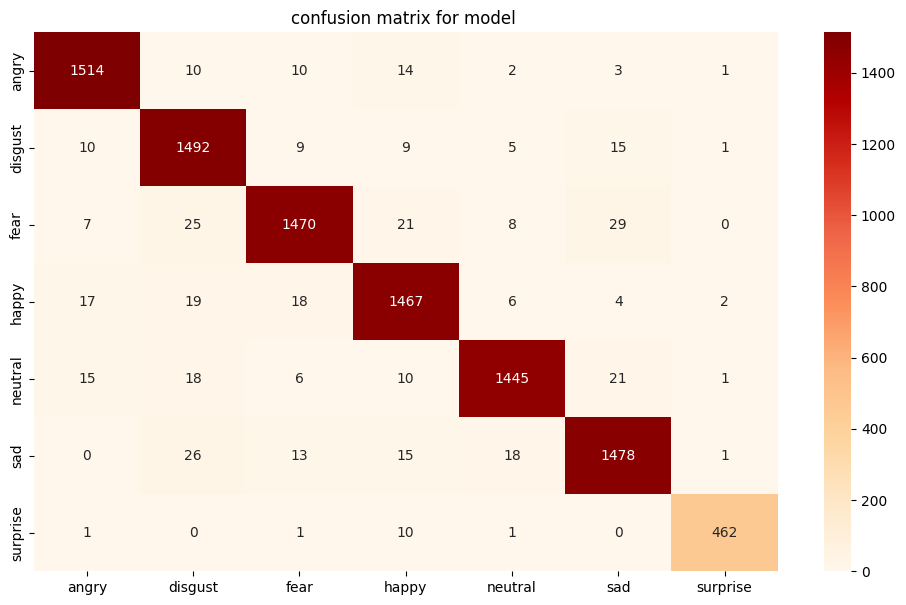

In [ ]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d',cmap="OrRd")
ax.set_title(f'confusion matrix for model ')
plt.show()

In [ ]:
filename = 'final_trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))